# Linear Regression

## Fitting a Line to Data

#### Cary Goltermann

### Objectives
By the end of the lesson you will be able to answer:
* Why is it called **Linear** Regression?
* How do we choose the "best" line?
* How do we evaluate our model?
* What hypothesis are we testing in Linear Regression?
* How do we interpret statsmodel output?
* What are the assumptions of Linear Regression?
* How do we verify that the assumptions are met by our model?
* How do we compare linear models to each other?

# Linear Regression Overview
### Fitting a line
### Linear relationships, Exact vs Inexact
### Where do we put the line?

# Linear Regression Overview
### Linear relationships, Exact vs Inexact
<img src="images/exact.png" width="400px" style="float: left"></img>
<img src="images/inexact.png" width="450px" style="float: left"></img>

# Choosing a Line

<center><img src="images/line_placement.png" width="580px"></img></center>


### Line Questions (2 mins):
* How many possible lines are there that can "fit" the data?
* How do we determine the best line of all these?
* Sum of errors?

# Expressing our model
## Simple (Bivariate) Linear Regression
* What you're presuming the world looks like:
    $$ y = \beta_0 + \beta_1 x + \epsilon $$
<br>
* $\beta_0$ and $\beta_1$ are unknown constants that represent the intercept and slope
* $\epsilon$, the error term, is i.i.d $N(0, \sigma^2)$

* The Linear Model: what you've created from data to estimate the world:
    $$ \hat{y} = \hat{\beta_0} + \hat{\beta_1}x $$
<br> 
* $\hat{\beta_0}$ and $\hat{\beta_1}$ are model coefficient estimates
* $\hat{y}$ indicates the prediction of $y$ based on $X=x$

# Expressing our model
## Multiple Linear Regression
* Model in matrix form

<center><img src="images/matrix_form.png" width="500px"></img></center>



* Design Matrix $X$
<img src="images/design_matrix.png" width="800px"></img>
* Coefficient Matrix $\beta$
<img src="images/coefficient_matrix.png" width="800px"></img>

# Assessing Model Fit
### RSS
$RSS = SSE = \sum_{i=1}^{n}{(y_i - \hat{y_i})^2}$
* How far off were we? Squared.
* In units of dependent variable.

### RSE (aka  RMSE)
$RSE = RMSE = \sqrt{\frac{RSS}{n - p - 1}} = \sqrt{\frac{\sum_{i=1}^{n}{(y_i - \hat{y_i})^2}}{n - p - 1}}$
* How far off were we, on average, controlling for degrees of freedom lost?
* Similarly, we have the standard error (biased or not depending on DOF), $s.e. = \frac{\sum_{i=1}^{n}{(y_i - \hat{y_i})^2}}{n - p - 1}$

### Types of Fit
Can have the same line but different fit.
<center><img src="images/tight_loose_fit.png" width="900px"></img></center>

### $R^2$: Coefficient of Determination

$$ R^2 = 1 - FUV = 1 - \frac{Unexplained}{TSS} = \frac{Explained}{TSS} $$

* Fraction unexplained variance, $FUV$
* Total sum of square deviations, $TSS$: $\sum_{i=1}^{n}(y_1 - \bar{y})^2$
* Explained/Regression sum of square deviations, $(E/R)SS$: $\sum_{i=1}^{n}(\hat{y_1} - \bar{y})^2$
* Error/Residual sum of square deviations, $(E/R)SS$: $\sum_{i=1}^{n}(y_1 - \hat{y_1})^2$
* $TSS = Explained + Unexplained$

### Deviations: Visually
<center><img src="images/rss.png" width="600px"></img><center>

### $R^2$: Visually
<img src="images/r2_1.png" width="350px" style="float: left"></img>
<img src="images/r2_0_line.png" width="320px" style="float: left"></img>
<img src="images/r2_0_quad.png" width="350px" style="float: left"></img>

* Notes on images:
    * We can have two lines with the same slope and intercept, each of which is the best fit line, and they can still be differently "good" fits if the data is spread out
    * If we didn't have a model, we would just predict the mean, so that's what we compare ourselves against to see how good our model is
    * We could have data that clearly has a signal but a low $R^2$ if we aren't properly modeling it; low $R^2$ isn't necessarily grounds for concluding there's no signal

### Hypothesis Testing Revisited

Question: What are the parameters we are estimating in linear regression?

<center> Our beta coefficients </center>

Question: Given that we are estimating parameters, what do you think that our null and alternative hypotheses should be?

<center> $H_0: \beta_1 = 0 \qquad H_A: \beta_1 \ne 0 $ </center>

# Interpreting Model Output

### Using statsmodels


In [1]:
import numpy as np
import random
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Ultramann/anaconda3/envs/python2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_gnp = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df_gnp.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [3]:
X = df_gnp.GNP  # Set up our design matrix, X
X = sm.add_constant(X)  # We need to manually add a constant, aka intercept, when working with statsmodels
y = df_gnp.Employed # Set up our target, y
X.head()

,const,GNP
1947,1.0,234.289
1948,1.0,259.426
1949,1.0,258.054
1950,1.0,284.599
1951,1.0,328.975


In [4]:
est = sm.OLS(y, X)
est = est.fit()
est.summary() 

/Users/Ultramann/anaconda3/envs/python2/lib/python2.7/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Wed, 05 Jul 2017   Prob (F-statistic):           8.36e-12
Time:                        16:24:17   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Let's not look at all of this output yet, focus on the middle part

In [5]:
# a utility function to only show the coefficient section of summary
from IPython.core.display import HTML

def short_summary(est, part):
    return HTML(est.summary().tables[part].as_html())

In [6]:
short_summary(est, 1)

,coef,std err,t,P>|t|,[0.025,0.975]
const,51.8436,0.681,76.087,0.000,50.382,53.305
GNP,0.0348,0.002,20.374,0.000,0.031,0.038


Talking points on short summary:
* Constant, GNP coefficients
    * Sanity check - do they point the right direction
    * Rough magnitude check (if you have a sense)
* Are the p values significant
* Confidence intervals, is 0 in the interval?

# Now let's look at the full summary

In [7]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Wed, 05 Jul 2017   Prob (F-statistic):           8.36e-12
Time:                        16:24:17   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Let's plot this model

In [8]:
# We pick 100 hundred points equally spaced from the min to the max
X_prime = np.linspace(X.GNP.min(), X.GNP.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before

# Now we calculate the predicted values
y_hat = est.predict(X_prime)

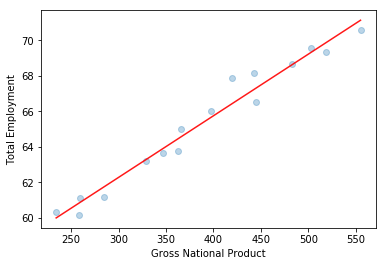

In [9]:
plt.scatter(X.GNP, y, alpha=0.3)  # Plot the raw data
plt.xlabel("Gross National Product")
plt.ylabel("Total Employment")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Add the regression line, colored in red

### Assumptions of Linear Regression

* Linearity
* Normality of Errors
* Constant Variance of Errors (Homoscedasticity)
* Independence of Errors
* Lack of Multicollinearity
        
We can't always meet these assumptions, and often have to find ways to combat that reality.

### Checking Normality of Residuals

* Can plot a historgram and eyeball if it looks normal.
    * This method is slightly prone to error.
* Can plot a quantile-qualtile plot, more next slide.
* Can use one of many statistcal tests:
    * Jarque–Bera test
    * Shapiro–Wilk test
    * Kologorov-Sinfov test
* In practice one would use many of these, both visual and statistical to determine normality of errors.

### QQ Plots
Compares the empirical quantiles from a model's rediduals to those that would occur in a true normal distribution
<center><img src="images/qq.png" width="400px"></img></center>
Watch this: https://www.youtube.com/watch?v=X9_ISJ0YpGw

# Analyzing Residuals

### Many of the assumptions of linear regression can be checked for a model by looking at it's residuals.

### Let's look at some residual plots thinking about the assumptions.

<center><img src="images/res_a.png" width="400px"></img></center>
<center>$\hat{y}$</center>

Notes: good residual plot, look normal, independent and constant.

<center><img src="images/res_b.png" width="400px"></img></center>
<center>$\hat{y}$</center>

Notes: descent residual plot, look fairly normal, but there are some possible outliers and possibly not independent.

<center><img src="images/res_c.png" width="400px"></img></center>
<center>$\hat{y}$</center>

Notes: residuals are curvilinear, this violates the linearity assumption.

<center><img src="images/res_d.png" width="400px"></img></center>
<center>$\hat{y}$</center>

Notes: residuals are heteroscedastic, this violates the constant variance assumption, instead depends on x.

<center><img src="images/res_e.png" width="400px"></img></center>
<center>$\hat{y}$</center>

Notes: indicates a linear relationship between the residuals and a variable not in the model; we probably want to try to find/measure that variable and add it into our model

# Outliers

* Outliers
    * Types of outliers
    * Detecting outliers
        * Studentized Residuals
        * Leverage
    * Residual plots

### Type of Outliers

<center><img src="images/types_of_outliers.png" width="600px"></img></center>


## Outliers
### Detecting outliers visually

We can make a **residual plot** to help identify outliers visually. In this case, we plot the residuals by the fitted/predicted value, $\hat{y}$.

Even better, we can **standardize** the residuals, dividing by the standard error. This allows us to see which points are outliers in the common way, perhaps by checking whether they're above or below 2 (roughly 95% of our data is covered by that region).

### Standardized residuals

<center><img src="images/standardized_residuals.png" width="500px"></img></center>

### Studentizing

Even better still, we can **"studentize"** the errors by dividing, not by the "global" standard error for our model, but by the standard error of our model at the particular value of y where the residual occurred.  Our confidence intervals change depending on how much data we have seen in a particular region.  If we've seen a lot of data, our intervals are tight; otherwise, they are wide.  So, it takes "more" for a data point to be considered an outlier if it is in a region in which we have little data.

### Studentizing Visually

<img src="images/studentized_residual_plot.png"></img>

### Leverage

* A high-leverage point is an observation with an unusual X value.
* It does not necessarily have a large effect on the regression model (it could lie right along the best fit line of a model fit without it).
* Most common measure is the "hat value": $h_{ii}=(H)_{ii}$
* The $i$th diagonal of the hat matrix: $$ H = X(X^TX)^{-1}X^T, $$ is the leverage of the particular data point.

#### Intuition

Dragging a single point upwards and seeing how much the prediction line follows. If, for a fixed $x$, we perturb $y$ and $\hat{y_i}$ moves a little, then it is low leverage; if it moves a lot, then it is high leverage. So you can think of it as $h_{ii} = \frac{d\hat{y_i}}{dy_i}$.

We can use Leverage to Studentize our errors

* The corresponding Studentized residual is then $$ t_i = \frac{\hat{\epsilon_i}}{ \hat{\sigma}\sqrt{1 - h_{ii}} } $$ where $\hat{\sigma}$ is an appropriate estimate of $\sigma$ (basically square root of RSE)

Now that we have either standardized (divided by "global" standard error) or studentized (divided by "local" standard error) residuals, we can use them to programmatically identify outlier points.  Roughly 95% of our data will fall within $\pm2$ standardized/studentized errors.  We likely don't want to throw out 1 in 20 data points, though, so perhaps we'll cut anything off if it's outside the $\pm3$ bounds.  Note, if we do find outliers we usually train two models, one with them and one without.  Also we might chase down the story behind the outlier data points, if we can (was data entered incorrectly? was there a tsunami that day? did the servers go down?).

# Multicollinearity 
Measuring the same thing two different ways.

If we had the grade of every class for a student, as well as their GPA, we have multicollinearity because GPA is a linear function of their grades.

Could also just be married_is_True and married_is_False as features.

### Perfect vs Partial
* Perfect: unlikely to occur in practice
  * Your model will often fail to run/converge (some libraries will still be ok, but don't count on it)
  * Consider a case where $\beta_1$ and $\beta_2$ measure "years since graduating Galvanize" and "years as a data scientist", and of course these are the same ;)
* Partial
  * Uncertainty in the model coefficients becomes large
  * Does not necessarily affect model accuracy or bias the coefficients

### Identifying Multicollinearity

* Correlation Matrix / Scatterplot Matrix / Bivariate Correlations
    * Can only pick up pairwise effects
* Variance Inflation Factors, VIF
    * Regress each of the independent variables on all the other independent variables
    * I.E. with a design matrix X of $p$ features, for each feature $i$, fit a linear model with the $i^{th}$ feature as the target and the remaining $p-1$ features as independent variables:
        $$ X_i = X_{p \setminus i}\beta $$

### Why VIF?

Question (2 mins): Why do we care about predicting one of the features with all the others?

### VIF Definition
$$ VIF_i = \frac{1}{1 - R_i^2} $$

* If any of these auxiliary $R^2$ values are near 1, there is high multicollinearity
* In the best case:
    * We can't predict our $i$th feature with the others, so $R_i^2$ is 0
    * This means VIF is 1, and $x_j$ is linearly independent of the other independent variables
* If $VIF > 10$, then multicollinearity is probably a problem
    * 10 is a rule of thumb; you may be more or less conservative

### Fixing Multicollinearity

* What should I do if I have high multicollinearity?
    * Try to gather more data
    * Consider combining multiple intercorrelated variables into one
    * Don't interpret coefficients, just use your model to predict
    * Discard the offending variable(s)


### Another Hypothesis Test
#### Are any of my features useful, a.k.a. should have a non-zero coefficient?

1) Set up hypotheses:
    $$ H_0: \beta_{1...p} = 0 $$

<center> $ H_A:$  at least one $\beta_j$ is nonzero </center>

Compare the difference in total squared error and the residual squared error with the residual squared error, scaled by features used (for DOF).

2) Compute F-statistic

 $$ F = \frac{\frac{TSS - RSS}{p}}{\frac{RSS}{n - p - 1}} ~ F_{p, n - p - 1} $$
 
3) Compute p-value
 ```python
 p_val = 1 - scs.f.cdf(F_stat, p, n - p_full - 1)
 ```

### Comparing Models

Sometime you want to check whether a model that is nested within another is significantly worse than the full model.

Reduced Model: $ Y = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p $

Full Model:    $ Y = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p + \beta_{p+1} x_{p+1} + ... + \beta_{p+k} x_{p+k} $

1) Set up hypotheses

$$ H_0: \beta_{1...k} = 0 $$

<center> $H_A:$ at least one of the added betas, $\beta_k$, is nonzero </center>

2) Compute F-statistic
 $$ F = \frac{\frac{(RSS_{red} - RSS_{full})}{(p_{full} - p_{red})}}{\frac{RSS_{full}}{(n - p_{full} -1)}},\; p_{full} = p + k $$

3) Compute p-value

  ```python
  p_val = 1 - scs.f.cdf(F_stat, p_full - p_red, 
                        n - p_full - 1)
  ```

### Objectives
By the end of the lesson you will be able to answer:
* Why is it called **Linear** Regression?
* How do we choose the "best" line?
* How do we evaluate our model?
* What hypothesis are we testing in Linear Regression?
* How do we interpret statsmodel output?
* What are the assumptions of Linear Regression?
* How do we verify that the assumptions are met by our model?
* How do we compare linear models to each other?